In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
accept = pd.read_csv("/accepted_2007_to_2018Q4.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.options.display.max_rows = 1000
accept.head().T

0  \
id                                                                                   68407277   
member_id                                                                                 NaN   
loan_amnt                                                                                3600   
funded_amnt                                                                              3600   
funded_amnt_inv                                                                          3600   
term                                                                                36 months   
int_rate                                                                                13.99   
installment                                                                            123.03   
grade                                                                                       C   
sub_grade                                                                                  C4   
emp_title                                                                             leadman   
emp_length                                                                          10+ years   
home_ownership                                                                       MORTGAGE   
annual_inc                                                                              55000   
verification_status                                                              Not Verified   
issue_d                                                                              Dec-2015   
loan_status                                                                        Fully Paid   
pymnt_plan                                                                                  n   
url                                         https://lendingclub.com/browse/loanDetail.acti...   
desc                                                                                      NaN   
purpose                                                                    debt_consolidation   
title                                                                      Debt consolidation   
zip_code                                                                                190xx   
addr_state                                                                                 PA   
dti                                                                                      5.91   
delinq_2yrs                                                                                 0   
earliest_cr_line                                                                     Aug-2003   
fico_range_low                                                                            675   
fico_range_high                                                                           679   
inq_last_6mths                                                                              1   
mths_since_last_delinq                                                                     30   
mths_since_last_record                                                                    NaN   
open_acc                                                                                    7   
pub_rec                                                                                     0   
revol_bal                                                                                2765   
revol_util                                                                               29.7   
total_acc                                                                                  13   
initial_list_status                                                                         w   
out_prncp                                                                                   0   
out_prncp_inv                                                                               0   
total_pymnt                                                                           4421.72   
total_pymnt_inv   

In [4]:
remained = ['loan_amnt','term','int_rate','emp_length','home_ownership','annual_inc','loan_status','purpose','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','application_type','acc_now_delinq']

remained_data = pd.DataFrame(accept, columns=remained)
remained_data

loan_amnt        term  int_rate emp_length home_ownership  \
0           3600.0   36 months     13.99  10+ years       MORTGAGE   
1          24700.0   36 months     11.99  10+ years       MORTGAGE   
2          20000.0   60 months     10.78  10+ years       MORTGAGE   
3          35000.0   60 months     14.85  10+ years       MORTGAGE   
4          10400.0   60 months     22.45    3 years       MORTGAGE   
...            ...         ...       ...        ...            ...   
2260696    40000.0   60 months     10.49    9 years       MORTGAGE   
2260697    24000.0   60 months     14.49    6 years           RENT   
2260698    14000.0   60 months     14.49  10+ years       MORTGAGE   
2260699        NaN         NaN       NaN        NaN            NaN   
2260700        NaN         NaN       NaN        NaN            NaN   

         annual_inc  loan_status             purpose  delinq_2yrs  \
0           55000.0   Fully Paid  debt_consolidation          0.0   
1           65000.0   Fully Paid      small_business          1.0   
2           63000.0   Fully Paid    home_improvement          0.0   
3          110000.0      Current  debt_consolidation          0.0   
4          104433.0   Fully Paid      major_purchase          1.0   
...             ...          ...                 ...          ...   
2260696    227000.0      Current  debt_consolidation          7.0   
2260697    110000.0  Charged Off  debt_consolidation          0.0   
2260698     95000.0      Current  debt_consolidation          0.0   
2260699         NaN          NaN                 NaN          NaN   
2260700         NaN          NaN                 NaN          NaN   

         inq_last_6mths  open_acc  pub_rec application_type  acc_now_delinq  
0                   1.0       7.0      0.0       Individual             0.0  
1                   4.0      22.0      0.0       Individual             0.0  
2                   0.0       6.0      0.0        Joint App             0.0  
3                   0.0      13.0      0.0       Individual             0.0  
4                   3.0      12.0      0.0       Individual             0.0  
...                 ...       ...      ...              ...             ...  
2260696             1.0       5.0      0.0       Individual             0.0  
2260697             0.0      10.0      1.0       Individual             0.0  
2260698             1.0       8.0      0.0       Individual             0.0  
2260699             NaN       NaN      NaN              NaN             NaN  
2260700             NaN       NaN      NaN              NaN             NaN  

[2260701 rows x 14 columns]

In [5]:
data = remained_data.dropna()

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


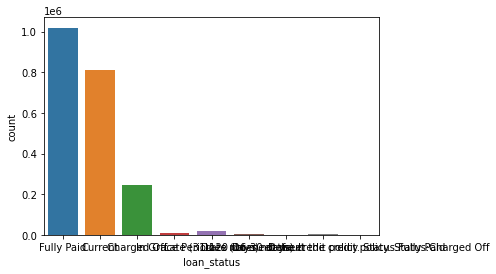

In [6]:
print(data['loan_status'].unique())
sns.countplot(data['loan_status'])

In [7]:
def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

pd.value_counts(data["loan_status"])
data["loan_status"] = coding(data["loan_status"], {'Current':0,
                                                 'Fully Paid':0,
                                                 'Late (31-120 days)':1,
                                                 'Charged Off':1,
                                                 'Does not meet the credit policy. Status:Fully Paid':1,
                                                 'Does not meet the credit policy. Status:Charged Off':1,
                                                 'Late (16-30 days)':1, 
                                                 'In Grace Period':1,
                                                 'Default': 1})
pd.value_counts(data["loan_status"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    1832216
1     281515
Name: loan_status, dtype: int64

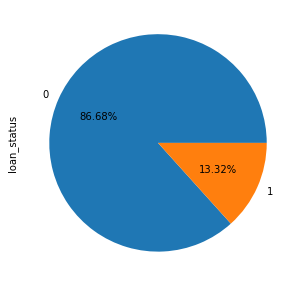

In [8]:
data["loan_status"].value_counts().plot.pie(autopct='%1.2f%%',figsize=(5, 5))

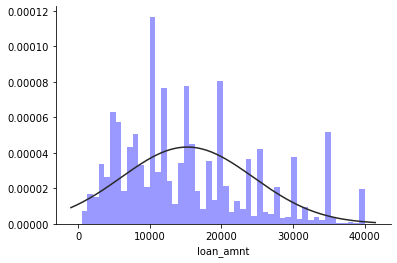

In [9]:
from scipy.stats import norm
sns.distplot(data.loan_amnt,fit=norm,kde=False,color='blue')
sns.despine(top=True)

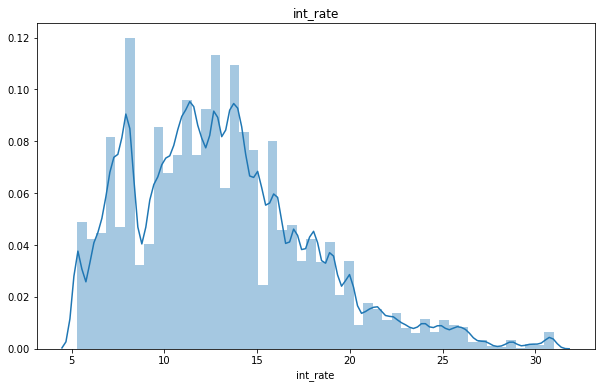

In [10]:
fig, ax = plt.subplots() 
sns.distplot(data['int_rate'])
plt.title('int_rate')
fig.set_size_inches(10, 6) 
plt.show()

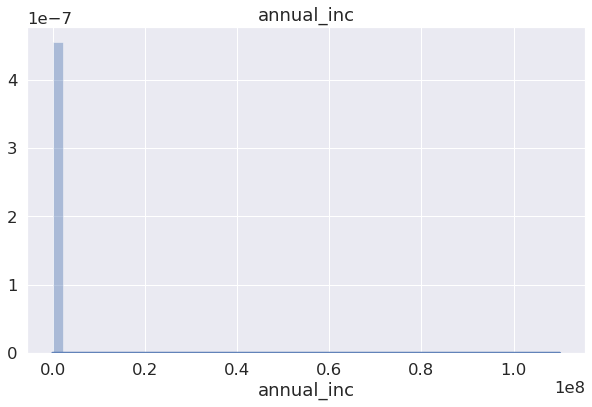

In [22]:
fig, ax = plt.subplots() 
sns.distplot(data['annual_inc'])
plt.title('annual_inc')
fig.set_size_inches(10, 6) 
plt.show()

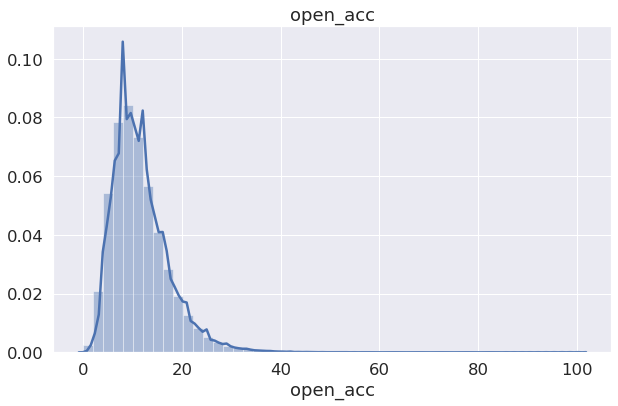

In [23]:
fig, ax = plt.subplots() 
sns.distplot(data['open_acc'])
plt.title('open_acc')
fig.set_size_inches(10, 6) 
plt.show()

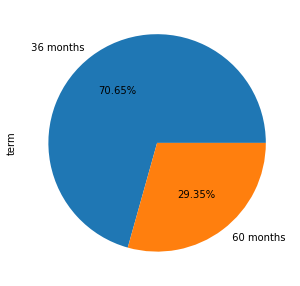

In [11]:
data["term"].value_counts().plot.pie(autopct='%1.2f%%',figsize=(5, 5))

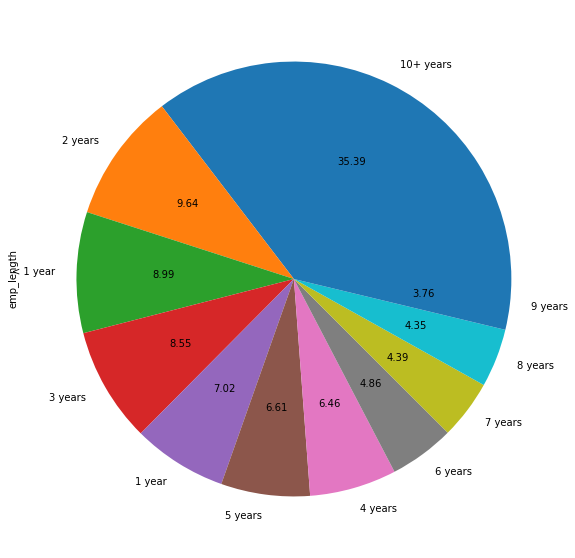

In [12]:
data['emp_length'].value_counts().plot.pie(autopct='%.2f',figsize=(10, 10))

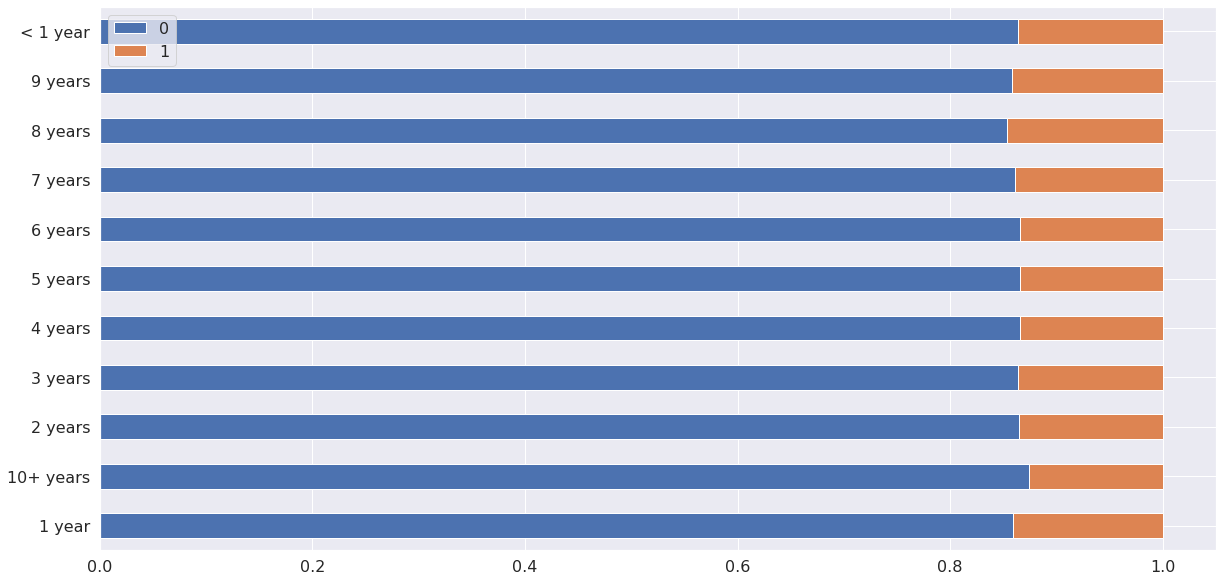

In [14]:
data.groupby('emp_length').loan_status.value_counts(normalize=True).unstack().plot(kind='barh', stacked=True,figsize=(20,10))
plt.legend(loc='upper left',prop={'size':16})
plt.ylabel('')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

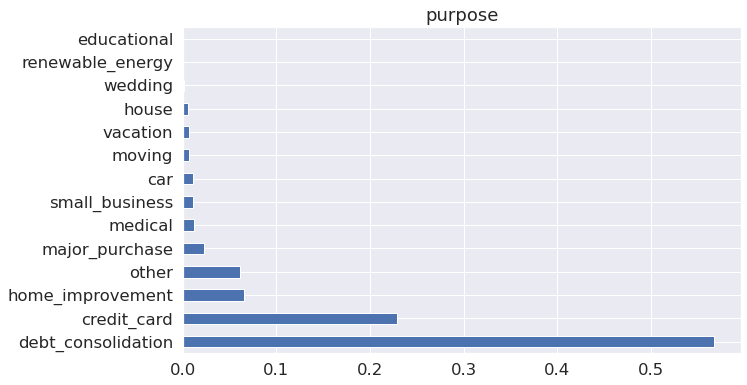

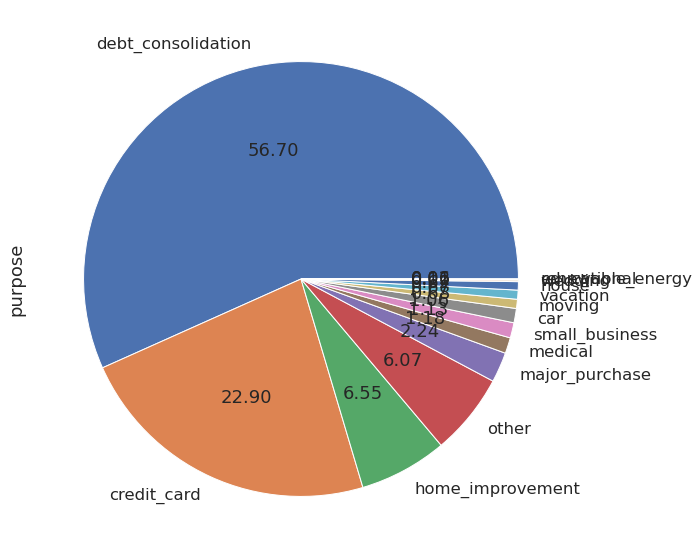

In [19]:
data.purpose.value_counts(normalize=True).plot(kind='barh',figsize=(10, 6))
plt.title('purpose')
plt.show()
data['purpose'].value_counts().plot.pie(autopct='%.2f',figsize=(10, 10))

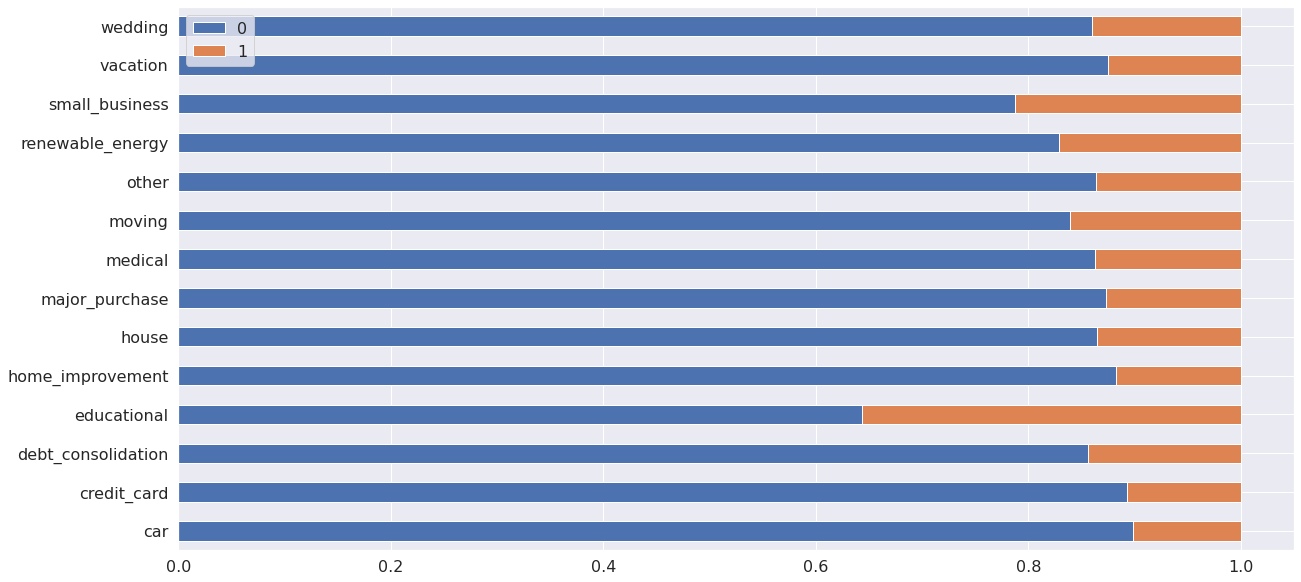

In [16]:
data.groupby('purpose').loan_status.value_counts(normalize=True).unstack().plot(kind='barh', stacked=True,figsize=(20,10))
plt.legend(loc='upper left',prop={'size':16})
plt.ylabel('')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

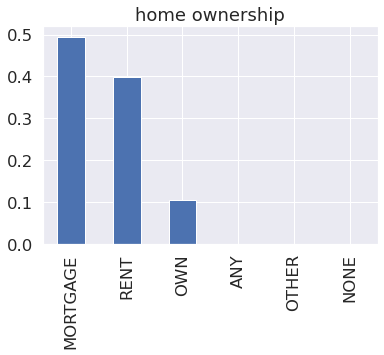

In [17]:
data.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.title('home ownership')
plt.show()

In [20]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }}
data = data.replace(mapping_dict) 